In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r'C:\Users\aabidh musthaq\Desktop\New folder (2)\Employee-churn-prediction\HR_Dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
df.rename(columns={'Departments ':'departments'},inplace=True)

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.shape

(14999, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [11]:
df.duplicated().sum()

3008

In [12]:
df[df.duplicated()] #no duplicates found in the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(11991, 10)

In [15]:
df['departments'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [16]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<AxesSubplot:>

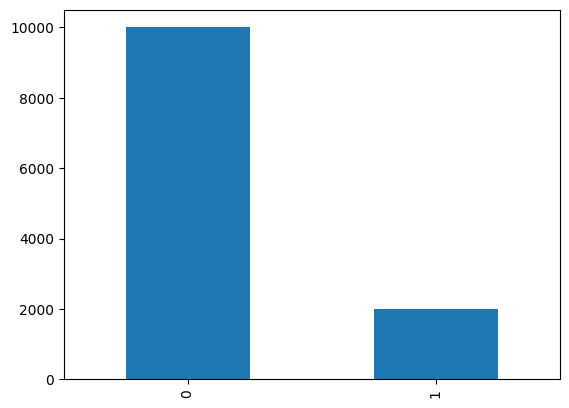

In [17]:
df['left'].value_counts().plot(kind='bar')

In [18]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [19]:
X = df.drop(columns=['left'])

In [20]:
y = df['left']

### Column Transformer and Pipeline

In [21]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [22]:
preprocessor = ColumnTransformer(transformers=[ #we have to use same name in the pipeline
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']), #standardizing the numerical columns
    ('nominal',OneHotEncoder(),['departments']), #nominal means no order in the data
    ('ordinal',OrdinalEncoder(),['salary']) #ordinal means there is an order in the data
    #by defulat which didnt mention columns will be dropped therefore we use passthrough to keep the columns
    
],remainder='passthrough') #using tuple to specify the type of transformation to be done on the columns

In [23]:
pipeline = Pipeline([
    ('preprocessor',preprocessor), #first step is preprocessor
    ('model',LogisticRegression()) #second step is model first step into 2nd step
    
]) #pipeline to combine the preprocessor and the model
#set of interconnected processing steps where output of one step is input to the next step

In [24]:
from sklearn import set_config

In [25]:
set_config(display='diagram')

In [26]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y) #stratify to keep the distribution of the target variable same in both train and test

In [28]:
pipeline.fit(X_train,y_train) #fitting the pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [29]:
y_pred = pipeline.predict(X_test) #predicting the values

In [30]:
accuracy_score(y_test,y_pred) #accuracy of the model

0.8370154230929554

In [31]:
precision_score(y_test,y_pred) #precision of the model means how many of the predicted values are actually correct

0.5209580838323353

In [32]:
recall_score(y_test,y_pred) #recall of the model means how many of the actual values are predicted correctly

0.2185929648241206

In [33]:
def model_scorer(model_name,model): #function to get the accuracy,precision and recall of the model funcion creste krnav
    
    output=[] #empty list to store the output
    
    output.append(model_name)
    
    pipeline = Pipeline([ #pipeline to combine the preprocessor and the model
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y) #stratify to keep the distribution of the target variable same in both train and test
    
    pipeline.fit(X_train,y_train) #fitting the pipeline
    
    y_pred = pipeline.predict(X_test) #predicting the values
    
    output.append(accuracy_score(y_test,y_pred)) #accuracy of the model
    
    output.append(precision_score(y_test,y_pred)) #precision of the model means how many of the predicted values are actually correct
    
    output.append(recall_score(y_test,y_pred)) #recall of the model means how many of the actual values are predicted correctly
    
    return output

In [34]:
model_dict={ #dictionary to store the models and the model names
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}

In [35]:
model_output=[] #empty list to store the output
for model_name,model in model_dict.items(): #loop to get the model name and the model
    model_output.append(model_scorer(model_name,model)) #model scorer is define function above

In [36]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9704043351396415, 0.8958837772397095, 0.9296482412060302],
 ['random_forest', 0.9866611087953314, 0.9919354838709677, 0.9271356783919598],
 ['XGB', 0.9824927052938724, 0.9635416666666666, 0.9296482412060302]]